In [1]:
import os
import glob
import numpy as np
import astropy.io as astr
import matplotlib.pyplot as plt
from matplotlib import colors
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
from matplotlib.ticker import AutoMinorLocator

def radial_profile(data, center):
    y, x = np.indices((data.shape))
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    r = r.astype(np.int)
    
    tbin = np.bincount(r.ravel(), data.ravel())
    nr = np.bincount(r.ravel())
    radialprofile = tbin / nr
    return radialprofile

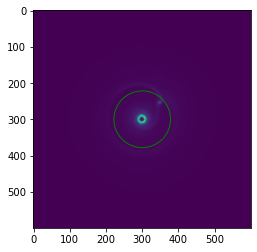

In [7]:
### 600 pixels to 400 AU 
au_scale = 600/400
actual_planet_distance = 52.178 * 600/400

filename = glob.glob("GRAIN0.1-D2G0.005-MASS0.0201.fits")
hdul = get_pkg_data_filename(filename[0])
image_data = astr.fits.getdata(hdul, ext=0)
data = image_data[0][0][0][:][:]

center = (data.shape[0]/2,data.shape[1]/2)
fig, ax = plt.subplots()
ax.imshow(data)
planet = plt.Circle((center[0],center[1]),color='g',radius=actual_planet_distance, fill=False)
ax.add_patch(planet)
plt.show()

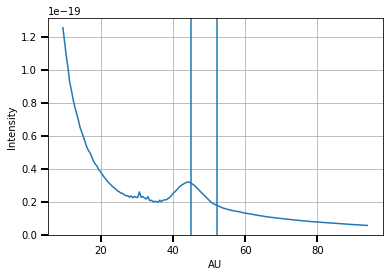

In [8]:
testx = np.linspace(0,200,425)
profile = radial_profile(data, center)

plt.figure()
plt.plot(testx[20:200],profile[20:200])
        
plt.tick_params(which='both', width=2)
plt.tick_params(which='major', length=7)
plt.tick_params(which='minor', length=4, color='r')
plt.grid()
plt.xlabel('AU')
plt.ylabel('Intensity')
plt.grid(which="minor")
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10),fancybox=True, shadow=True)
plt.axvline(x = 52.17)
plt.axvline(x = 45)
plt.show()